In [264]:
import numpy as np
import gensim
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile
import os

In [265]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [266]:
print("현재 디렉토리:", os.getcwd())
os.chdir("/content/gdrive/MyDrive/ai/greenpower/")
print("이동 후 현재 디렉토리:", os.getcwd())

현재 디렉토리: /content/gdrive/My Drive/ai/greenpower
이동 후 현재 디렉토리: /content/gdrive/MyDrive/ai/greenpower


In [267]:
import pandas as pd

# CSV 파일 불러오기
data = pd.read_csv("./data/log.csv")

# UserID, GroupId, Year, Month가 같은 행들의 Summary를 합치기
grouped_data = data.groupby(['UserID', 'GroupId', 'Year', 'Month'])['Comment'].apply(lambda x: ' '.join(x)).reset_index()

# 결과를 새로운 CSV 파일에 저장
grouped_data.to_csv("./data/before.csv", index=False)

In [268]:
import os
import zipfile
from urllib.request import urlretrieve

# 다운로드할 파일 URL
file_url = "http://nlp.stanford.edu/data/glove.6B.zip"

# 다운로드 및 압축 풀 위치
output_path = "./data"

# 파일 다운로드 및 압축 풀기
if not os.path.exists(output_path):
    os.makedirs(output_path)

# 파일 경로 설정
zip_file_path = "./data/"+"glove.6B.zip"

# 파일 다운로드
print("Downloading glove.6B.zip...")
urlretrieve(file_url, filename=zip_file_path)
print("Download completed!")

# 압축 풀기
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    print("Extracting files...")
    zip_ref.extractall(output_path)
    print("Extraction completed!")

# 압축 해제 후 압축 파일 삭제
os.remove(zip_file_path)

print("Process completed successfully!")

'import os\nimport zipfile\nfrom urllib.request import urlretrieve\n\n# 다운로드할 파일 URL\nfile_url = "http://nlp.stanford.edu/data/glove.6B.zip"\n\n# 다운로드 및 압축 풀 위치\noutput_path = "./data"\n\n# 파일 다운로드 및 압축 풀기\nif not os.path.exists(output_path):\n    os.makedirs(output_path)\n\n# 파일 경로 설정\nzip_file_path = os.path.join(output_path, "glove.6B.zip")\n\n# 파일 다운로드\nprint("Downloading glove.6B.zip...")\nurlretrieve(file_url, filename=zip_file_path)\nprint("Download completed!")\n\n# 압축 풀기\nwith zipfile.ZipFile(zip_file_path, \'r\') as zip_ref:\n    print("Extracting files...")\n    zip_ref.extractall(output_path)\n    print("Extraction completed!")\n\n# 압축 해제 후 압축 파일 삭제\nos.remove(zip_file_path)\n\nprint("Process completed successfully!")'

In [269]:
file_path = "./data/glove.6B.100d.txt"

glove_dict = dict()
f = open(file_path, encoding="utf8") # 100차원의 GloVe 벡터를 사용

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 100개의 값을 가지는 array로 변환
    glove_dict[word] = word_vector_arr
f.close()

In [270]:
glove_dict['cat']

array([ 0.23088  ,  0.28283  ,  0.6318   , -0.59411  , -0.58599  ,
        0.63255  ,  0.24402  , -0.14108  ,  0.060815 , -0.7898   ,
       -0.29102  ,  0.14287  ,  0.72274  ,  0.20428  ,  0.1407   ,
        0.98757  ,  0.52533  ,  0.097456 ,  0.8822   ,  0.51221  ,
        0.40204  ,  0.21169  , -0.013109 , -0.71616  ,  0.55387  ,
        1.1452   , -0.88044  , -0.50216  , -0.22814  ,  0.023885 ,
        0.1072   ,  0.083739 ,  0.55015  ,  0.58479  ,  0.75816  ,
        0.45706  , -0.28001  ,  0.25225  ,  0.68965  , -0.60972  ,
        0.19578  ,  0.044209 , -0.31136  , -0.68826  , -0.22721  ,
        0.46185  , -0.77162  ,  0.10208  ,  0.55636  ,  0.067417 ,
       -0.57207  ,  0.23735  ,  0.4717   ,  0.82765  , -0.29263  ,
       -1.3422   , -0.099277 ,  0.28139  ,  0.41604  ,  0.10583  ,
        0.62203  ,  0.89496  , -0.23446  ,  0.51349  ,  0.99379  ,
        1.1846   , -0.16364  ,  0.20653  ,  0.73854  ,  0.24059  ,
       -0.96473  ,  0.13481  , -0.0072484,  0.33016  , -0.1236

In [271]:
embedding_dim = 100
zero_vector = np.zeros(embedding_dim)

In [272]:
# 단어 벡터의 평균으로부터 문장 벡터를 얻는다.
def calculate_sentence_vector(sentence):
  return sum([glove_dict.get(word, zero_vector)
                  for word in sentence])/len(sentence)

In [273]:
eng_sent = ['I', 'am', 'a', 'student']
sentence_vector = calculate_sentence_vector(eng_sent)
print(len(sentence_vector))

100


In [274]:
kor_sent = ['전', '좋은', '학생', '입니다']
sentence_vector = calculate_sentence_vector(kor_sent)
print(sentence_vector)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [275]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from urllib.request import urlretrieve
import zipfile
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

In [276]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [277]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [278]:
stop_words = stopwords.words('english')

In [279]:
data = pd.read_csv("./data/before.csv")
data.head()

,UserID,GroupId,Year,Month,Comment
0,greenpower,euron,2024.0,3.0,"Once upon a time, a queen pricked her finger o..."


In [280]:
data = data[['Comment']]
data['sentences'] = data['Comment'].apply(sent_tokenize)
data

,Comment,sentences
0,"Once upon a time, a queen pricked her finger o...","[Once upon a time, a queen pricked her finger ..."


In [281]:
# 토큰화 함수
def tokenization(sentences):
    return [word_tokenize(sentence) for sentence in sentences]

# 전처리 함수
def preprocess_sentence(sentence):
  # 영어를 제외한 숫자, 특수 문자 등은 전부 제거. 모든 알파벳은 소문자화
  sentence = [re.sub(r'[^a-zA-z\s]', '', word).lower() for word in sentence]
  # 불용어가 아니면서 단어가 실제로 존재해야 한다.
  return [word for word in sentence if word not in stop_words and word]

# 위 전처리 함수를 모든 문장에 대해서 수행. 이 함수를 호출하면 모든 행에 대해서 수행.
def preprocess_sentences(sentences):
    return [preprocess_sentence(sentence) for sentence in sentences]

In [282]:
data['tokenized_sentences'] = data['sentences'].apply(tokenization)
data['tokenized_sentences'] = data['tokenized_sentences'].apply(preprocess_sentences)
data

,Comment,sentences,tokenized_sentences
0,"Once upon a time, a queen pricked her finger o...","[Once upon a time, a queen pricked her finger ...","[[upon, time, queen, pricked, finger, black, s..."


In [283]:
embedding_dim = 100
zero_vector = np.zeros(embedding_dim)

In [284]:
# 단어 벡터의 평균으로부터 문장 벡터를 얻는다.
def calculate_sentence_vector(sentence):
  if len(sentence) != 0:
    return sum([glove_dict.get(word, zero_vector)
                  for word in sentence])/len(sentence)
  else:
    return zero_vector

In [285]:
# 각 문장에 대해서 문장 벡터를 반환
def sentences_to_vectors(sentences):
    return [calculate_sentence_vector(sentence)
              for sentence in sentences]

In [286]:
data['SentenceEmbedding'] = data['tokenized_sentences'].apply(sentences_to_vectors)
data[['SentenceEmbedding']]

,SentenceEmbedding
0,"[[-0.09997338, -0.20811564, 0.14673711, 0.0515..."


In [287]:
def similarity_matrix(sentence_embedding):
  sim_mat = np.zeros([len(sentence_embedding), len(sentence_embedding)])
  for i in range(len(sentence_embedding)):
      for j in range(len(sentence_embedding)):
        sim_mat[i][j] = cosine_similarity(sentence_embedding[i].reshape(1, embedding_dim),
                                          sentence_embedding[j].reshape(1, embedding_dim))[0,0]
  return sim_mat

In [288]:
data['SimMatrix'] = data['SentenceEmbedding'].apply(similarity_matrix)
data['SimMatrix']

0    [[0.9999998807907104, 0.8064402937889099, 0.73...
Name: SimMatrix, dtype: object

In [289]:
print('두번째 샘플의 문장 개수 :',len(data['tokenized_sentences'][0]))
print('두번째 샘플의 문장 벡터가 모인 문장 행렬의 크기(shape) :',np.shape(data['SentenceEmbedding'][0]))
print('두번째 샘플의 유사도 행렬의 크기(shape) :',data['SimMatrix'][0].shape)

두번째 샘플의 문장 개수 : 30
두번째 샘플의 문장 벡터가 모인 문장 행렬의 크기(shape) : (30, 100)
두번째 샘플의 유사도 행렬의 크기(shape) : (30, 30)


In [290]:
def draw_graphs(sim_matrix):
  nx_graph = nx.from_numpy_array(sim_matrix)
  plt.figure(figsize=(10, 10))
  pos = nx.spring_layout(nx_graph)
  nx.draw(nx_graph, with_labels=True, font_weight='bold')
  nx.draw_networkx_edge_labels(nx_graph,pos,font_color='red')
  plt.show()

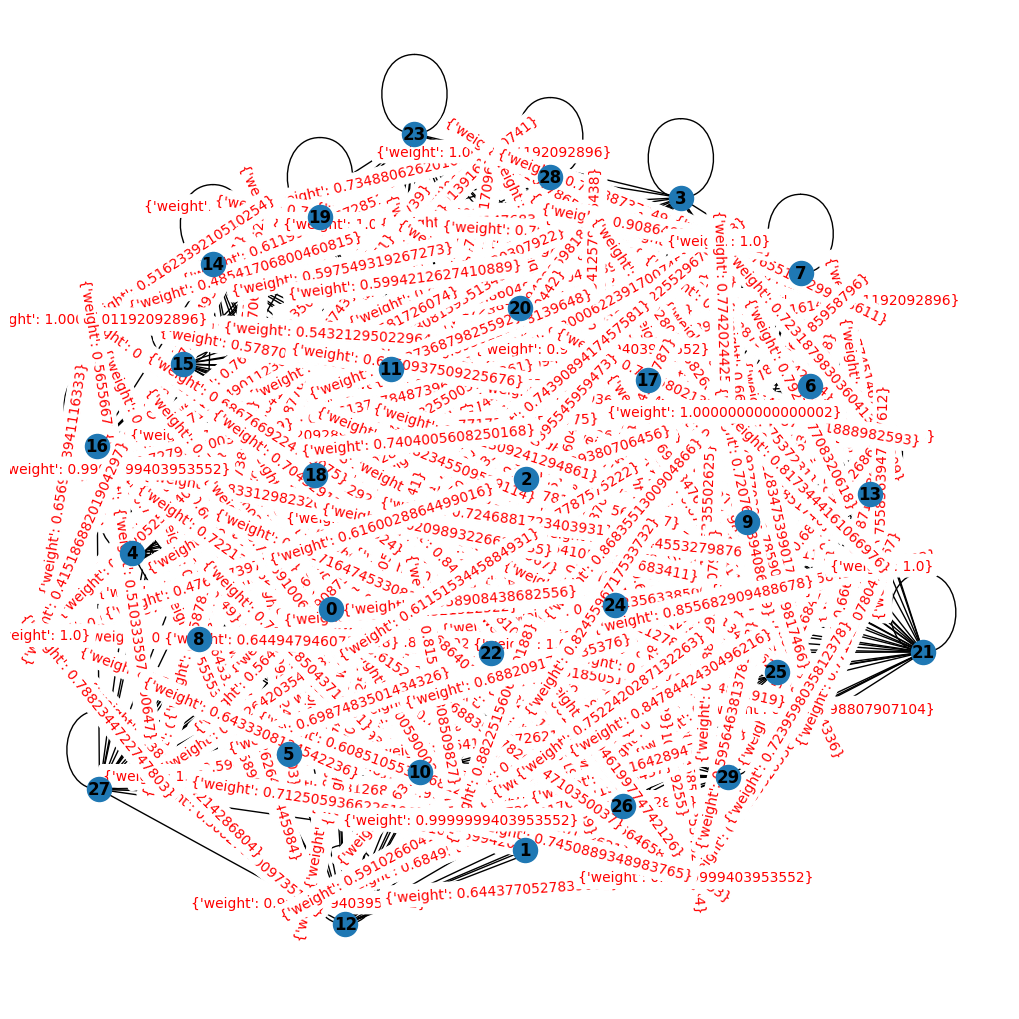

In [291]:
draw_graphs(data['SimMatrix'][0])

In [292]:
def calculate_score(sim_matrix):
    nx_graph = nx.from_numpy_array(sim_matrix)
    scores = nx.pagerank(nx_graph)
    return scores

In [293]:
data['score'] = data['SimMatrix'].apply(calculate_score)
data[['SimMatrix', 'score']]

,SimMatrix,score
0,"[[0.9999998807907104, 0.8064402937889099, 0.73...","{0: 0.03236235505772412, 1: 0.0350305511943942..."


In [294]:
data['score'][0]

{0: 0.03236235505772412,
 1: 0.03503055119439427,
 2: 0.03455393245015369,
 3: 0.03415969525888478,
 4: 0.03399940638315993,
 5: 0.03556155385310208,
 6: 0.03273324594117982,
 7: 0.03266013288839274,
 8: 0.03537049594031529,
 9: 0.03248829482215426,
 10: 0.0355044484017403,
 11: 0.0355253894515399,
 12: 0.02788501875679359,
 13: 0.03426179812245016,
 14: 0.035415183766826175,
 15: 0.03453325086550094,
 16: 0.034133720996006034,
 17: 0.03490020896608742,
 18: 0.03568572154024549,
 19: 0.030180693355208458,
 20: 0.0338807235223436,
 21: 0.02861267104555546,
 22: 0.031453166304766994,
 23: 0.03191845977689793,
 24: 0.03629885770666233,
 25: 0.03444156273762194,
 26: 0.029244786474729948,
 27: 0.027270590346105558,
 28: 0.03423682816857782,
 29: 0.035697255904878836}

In [295]:
def ranked_sentences(sentences, scores, n=3):
    top_scores = sorted(((scores[i],s)
                         for i,s in enumerate(sentences)),
                                reverse=True)
    top_n_sentences = [sentence
                        for score,sentence in top_scores[:n]]
    return " ".join(top_n_sentences)

In [296]:
data['Summary'] = data.apply(lambda x:
                            ranked_sentences(x.sentences,
                            x.score), axis=1)

In [297]:
print(data.loc[0].Comment)
print(data.loc[0].Summary)


Once upon a time, a queen pricked her finger on a black spindle and died. She left behind a beautiful daughter named Snow White. Snow White's stepmother, the Evil Queen, becomes jealous of her beauty. The Evil Queen orders a huntsman to kill Snow White in the forest. The huntsman spares Snow White's life and she finds refuge with seven dwarfs. The Evil Queen discovers Snow White is alive and visits her disguised as an old woman. She tricks Snow White into eating a poisoned apple, causing her to fall into a deep sleep. The dwarfs place Snow White in a glass coffin in the forest. A prince comes across the glass coffin and falls in love with Snow White. He kisses her, breaking the curse, and Snow White awakens. Snow White and the prince fall in love and plan to marry. The Evil Queen learns of Snow White's awakening and tries to stop the wedding. She attends the wedding and is punished for her evil deeds. Snow White forgives the Evil Queen, and peace is restored to the kingdom. Snow White 

In [298]:
result = data.loc[0].Summary

before_data = pd.read_csv("./data/before.csv")
before_data.iloc[0]['Comment'] = result
print(before_data)
before_data.to_csv("./data/after.csv", index=False, header=True)

       UserID GroupId    Year  Month  \
0  greenpower   euron  2024.0    3.0   

                                             Comment  
0  Once upon a time, a queen pricked her finger o...  


<ipython-input-298-8177e7b13fd6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_data.iloc[0]['Comment'] = result
